# IE582 Fall 2019 First Homework
## Fatih Kubilay Yavuz

I used Colab, so, handled the data from my drive
Here, I mount the drive to my colab local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Downloading data

In [2]:
import os
import glob
import shutil

zip_files=glob.glob("drive/My Drive/colab_datas/IE582Fall2019_data_files/*")
for zip_fi in zip_files:
    fn=zip_fi.split("/")[-1]
    shutil.copy(zip_fi, fn)
    !unzip $fn
[os.remove(i) for i in os.listdir() if i.endswith(".zip")]

Archive:  matches.zip
  inflating: matches.csv             
Archive:  bets.zip
  inflating: bets.csv                
Archive:  stats.zip
  inflating: stats.csv               
Archive:  booking.zip
  inflating: booking.csv             
Archive:  goals.zip
  inflating: goals.csv               


[None, None, None, None, None]

In [3]:
os.listdir()

['.config',
 'bets.csv',
 'goals.csv',
 'drive',
 'matches.csv',
 'booking.csv',
 'stats.csv',
 'sample_data']

### Importing necessary packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_context("paper")
sns.set_style("darkgrid")
pd.options.display.max_columns=None

### Reading data

In [28]:
matches=pd.read_csv("matches.csv")
premier_lig=matches.loc[matches["league_id"]==148]["match_id"].unique()
matches=matches.loc[matches["match_id"].isin(premier_lig)]

bets=pd.read_csv("bets.csv")
bets=bets.loc[bets["match_id"].isin(premier_lig)]

goals=pd.read_csv("goals.csv")
goals=goals.loc[goals["match_id"].isin(premier_lig)]

booking=pd.read_csv("booking.csv")
booking=booking.loc[booking["match_id"].isin(premier_lig)]

stats=pd.read_csv("stats.csv")
stats=stats.loc[stats["match_id"].isin(premier_lig)]
bets.sample(10)

,match_id,odd_bookmakers,odd_epoch,variable,value
2043868,224503,bet365.it,1569815521,o+5.5,13.00
1767445,224452,1xBet,1566290787,u+1.5,3.96
775965,167625,Betfred,1547879604,odd_2,3.20
706500,165507,Betway,1546870442,u+3.5,1.38
857300,169790,Betclic,1548471251,o+4.5,5.65
408530,224459,Asianodds,1508013746,u+3,1.70
1696666,224440,Unibet,1566001296,ah-2.5_2,1.06
1088955,180820,1xBet,1551278774,ah-2_2,1.02
852091,169790,10Bet,1548471251,u+1.5,3.70
1786042,224451,Jetbull,1566792814,ah-1.5_1,1.79


###### When we take a look at the data, there are na's in away and home scores, that's maybe because the matches continued at the time of the of the data crawling.

In [29]:
matches.isna().sum()

match_awayteam_id                  0
match_hometeam_id                  0
match_id                           0
epoch                              0
match_status                      10
match_live                         0
match_hometeam_name                0
match_awayteam_name                0
match_hometeam_score              10
match_awayteam_score              10
match_hometeam_halftime_score     59
match_awayteam_halftime_score     59
match_hometeam_extra_score        59
match_awayteam_extra_score        59
match_hometeam_penalty_score     628
match_awayteam_penalty_score     628
league_id                          0
dtype: int64

###### We first drop the nonfinished matches in order to perform the task.;

In [0]:
matches_wo_na=matches.loc[~(matches["match_status"]).isna()]

In [0]:
home_scores=matches_wo_na["match_hometeam_score"].astype(int)
away_scores=matches_wo_na["match_awayteam_score"].astype(int)
home_away=(home_scores-away_scores).astype(int)

## Task 1 
##### First part 

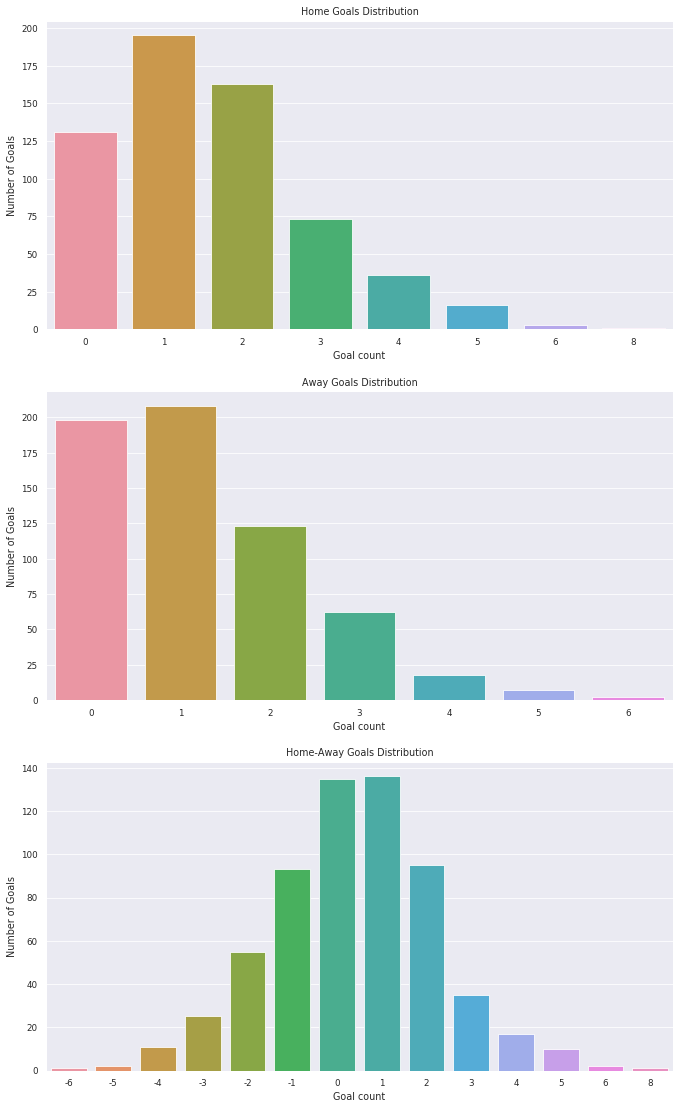

In [32]:
fig,ax=plt.subplots(3,figsize=(10,18))
for i in ax:
    i.set_xlabel("Goal count")
    i.set_ylabel("Number of Goals")
ax[0].set_title("Home Goals Distribution")
ax[1].set_title("Away Goals Distribution")
ax[2].set_title("Home-Away Goals Distribution")
sns.barplot(x=home_scores.value_counts().index,y=home_scores.value_counts().values,ax=ax[0])
sns.barplot(x=away_scores.value_counts().index,y=away_scores.value_counts().values,ax=ax[1])
sns.barplot(x=home_away.value_counts().index,y=home_away.value_counts().values,ax=ax[2])

##### Second Part
###### As indicated the home and away goals fit on a poisson distribution perfectly, their difference fits on a normal distribution.

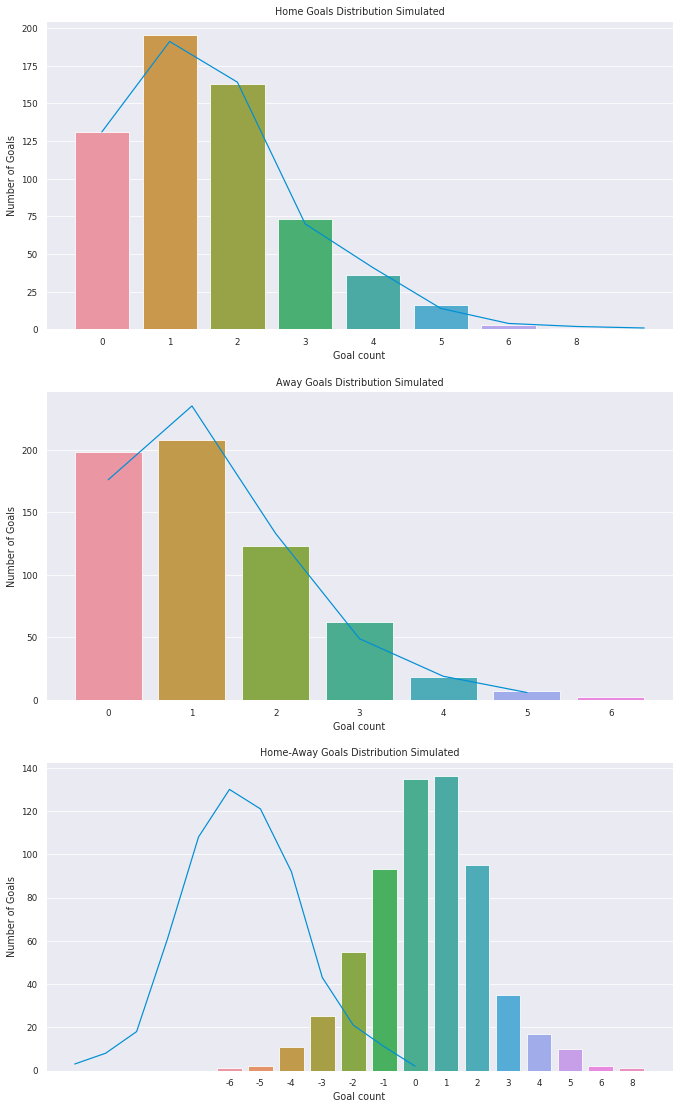

In [33]:
# Dont understand why doesnt distplot work
fig,ax=plt.subplots(3,figsize=(10,18))
for i in ax:
    i.set_xlabel("Goal count")
    i.set_ylabel("Number of Goals")
ax[0].set_title("Home Goals Distribution Simulated")
ax[1].set_title("Away Goals Distribution Simulated")
ax[2].set_title("Home-Away Goals Distribution Simulated")
sns.barplot(x=home_scores.value_counts().index,y=home_scores.value_counts().values,ax=ax[0])
sns.barplot(x=away_scores.value_counts().index,y=away_scores.value_counts().values,ax=ax[1])
sns.barplot(x=home_away.value_counts().index,y=home_away.value_counts().values,ax=ax[2])
for i,arr in enumerate([home_scores,away_scores]):
    home_poisson=np.random.poisson(arr.mean(), len(arr))
    unq,counts=np.unique(home_poisson,return_counts=True)
    sns.lineplot(x=unq,y=counts,ax=ax[i])
a=np.random.normal(home_away.mean(),home_away.std(),size=len(home_away))
a=pd.Series(a.round().astype(int))
sns.lineplot(x=a.value_counts().index,y=a.value_counts().values,ax=ax[2])

## Task 2
##### In the task, we were asked to choose at least 4 bookmakers, so i chose 4 bookmakers with the largest counts.

In [34]:
bets.odd_bookmakers.value_counts()[0:4]

1xBet          15619
18bet          10939
Marathonbet    10248
bet365         10221
Name: odd_bookmakers, dtype: int64

In [0]:
bookmakers=["1xBet","18bet","Marathonbet","bet365"]

###### Here we see there are more that one odd for one odd type. That's probably because, he indicated site is a live-betting site, and the odds are taken throught out the match.

In [39]:
bets.loc[(bets["odd_bookmakers"]=="10Bet")&(bets["variable"]=="odd_1")&(bets["match_id"]==224511)]

,match_id,odd_bookmakers,odd_epoch,variable,value
435928,224511,10Bet,1508854752,odd_1,4.35
2163001,224511,10Bet,1571196852,odd_1,3.70
2165038,224511,10Bet,1571212779,odd_1,3.70
2171568,224511,10Bet,1571252239,odd_1,3.75
2187957,224511,10Bet,1571298779,odd_1,3.65


##### We see that some odd are 0 so, this causes probabilities to be infinity. Thus, I dropped the values with 0 odds

In [40]:
bets_mod=bets.loc[(bets["odd_bookmakers"].isin(bookmakers))&(bets["variable"].isin(["odd_1","odd_2","odd_x"]))]
bets_mod["probs"]=1/bets_mod["value"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
ids_tbd=bets_mod.loc[bets_mod["value"]==0]["match_id"].value_counts().index
bets_mod=bets_mod.loc[~bets_mod["match_id"].isin(ids_tbd)]
del bets_mod["odd_epoch"]
bets_mod.sample(10)

,match_id,odd_bookmakers,variable,value,probs
1598405,218856,1xBet,odd_x,3.58,0.279330
957312,174029,18bet,odd_2,3.70,0.270270
1360299,200965,1xBet,odd_x,3.76,0.265957
1303394,196506,1xBet,odd_2,2.26,0.442478
2128212,224507,Marathonbet,odd_1,12.25,0.081633
400009,224428,Marathonbet,odd_x,4.70,0.212766
1666839,224431,bet365,odd_1,2.40,0.416667
1647585,224425,18bet,odd_2,1.26,0.793651
436442,224447,18bet,odd_x,4.20,0.238095
1327951,198595,Marathonbet,odd_x,3.40,0.294118


###### I pivoted the dataframe in order to ease the calculations, and plotting.

In [48]:
bets_pivoted=pd.pivot_table(bets_mod,values=["value","probs"],columns=["variable"],index=["match_id","odd_bookmakers"]).reset_index()
bets_pivoted.columns=["match_id","odd_bookmakers","probs_1","probs_2","probs_x","value_1","value_2","value_x"]
bets_pivoted["probs_2"]=bets_pivoted["probs_2"]/(bets_pivoted["probs_2"]+bets_pivoted["probs_x"]+bets_pivoted["probs_1"])
bets_pivoted["probs_1"]=bets_pivoted["probs_1"]/(bets_pivoted["probs_2"]+bets_pivoted["probs_x"]+bets_pivoted["probs_1"])
bets_pivoted["probs_x"]=bets_pivoted["probs_x"]/(bets_pivoted["probs_2"]+bets_pivoted["probs_x"]+bets_pivoted["probs_1"])
bets_pivoted["home_minus_away"]=bets_pivoted["probs_1"]-bets_pivoted["probs_2"]
bets_pivoted.head()

,match_id,odd_bookmakers,probs_1,probs_2,probs_x,value_1,value_2,value_x,home_minus_away
0,150842,1xBet,0.193340,0.547814,0.267217,5.10,1.77,3.70,-0.354474
1,150842,Marathonbet,0.189426,0.552635,0.266978,5.20,1.75,3.70,-0.363209
2,150844,1xBet,0.317244,0.393457,0.298926,3.09,2.46,3.30,-0.076213
3,150844,Marathonbet,0.315817,0.395806,0.298654,3.10,2.44,3.30,-0.079989
4,156845,18bet,0.401997,0.286993,0.334316,2.35,3.22,2.89,0.115003


Get only Draw matches from match_id

In [0]:
matches_finished_draw=matches_wo_na.loc[matches_wo_na["match_hometeam_score"]==matches_wo_na["match_awayteam_score"]]["match_id"].values
# bets_pivoted=bets_pivoted.loc[bets_pivoted["match_id"].isin(matches_finished_draw)].reset_index(drop=True)

###### The plot of the "Home win"-"Away win" and "Draw" probabilities for each bookmaker I chose

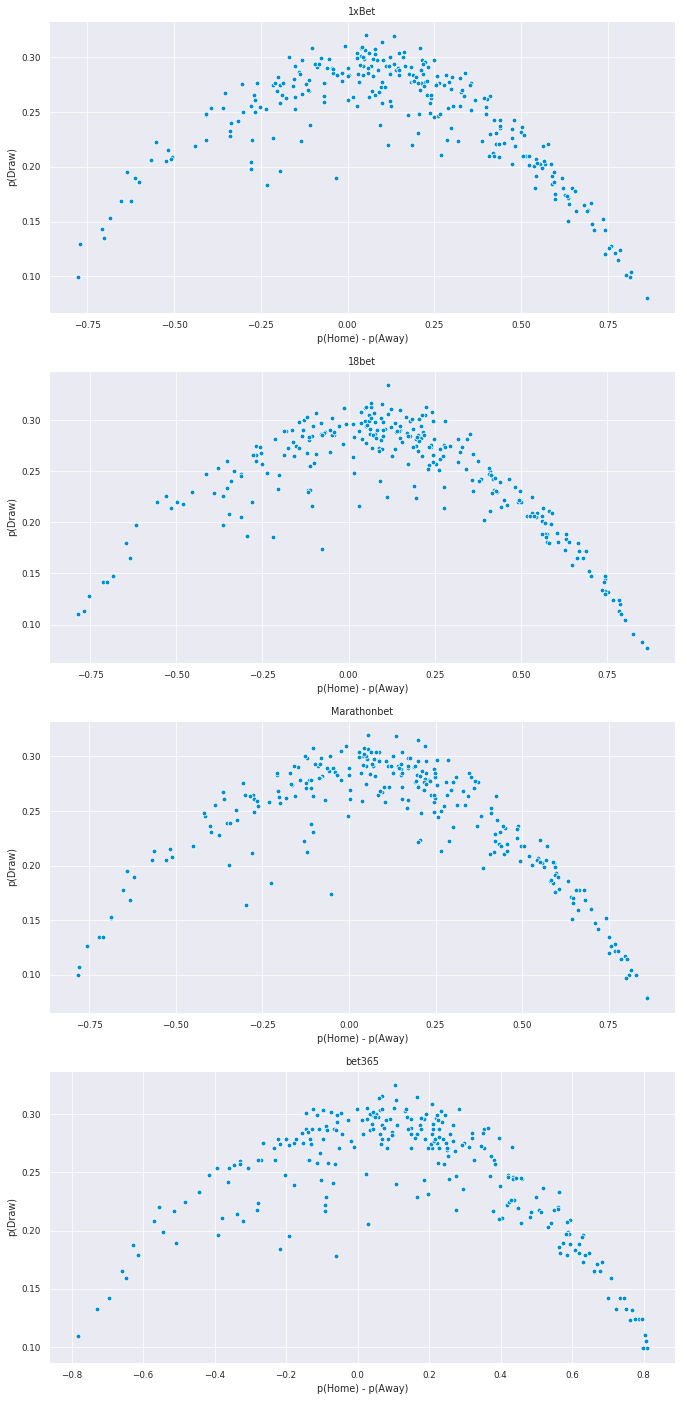

In [50]:
_,axx=plt.subplots(4,figsize=(10,23))
for i,bm in enumerate(bookmakers):
    bm_bets=bets_pivoted.loc[bets_pivoted["odd_bookmakers"]==bm]
    sns.scatterplot(x=bm_bets["home_minus_away"], y=bm_bets["probs_x"],ax=axx[i])
    axx[i].set_title(bm)
    axx[i].set_xlabel("p(Home) - p(Away)")
    axx[i].set_ylabel("p(Draw)")

###### The plots after we discretize the "Home win" - "Away win" probability for each bookmaker  I chose.

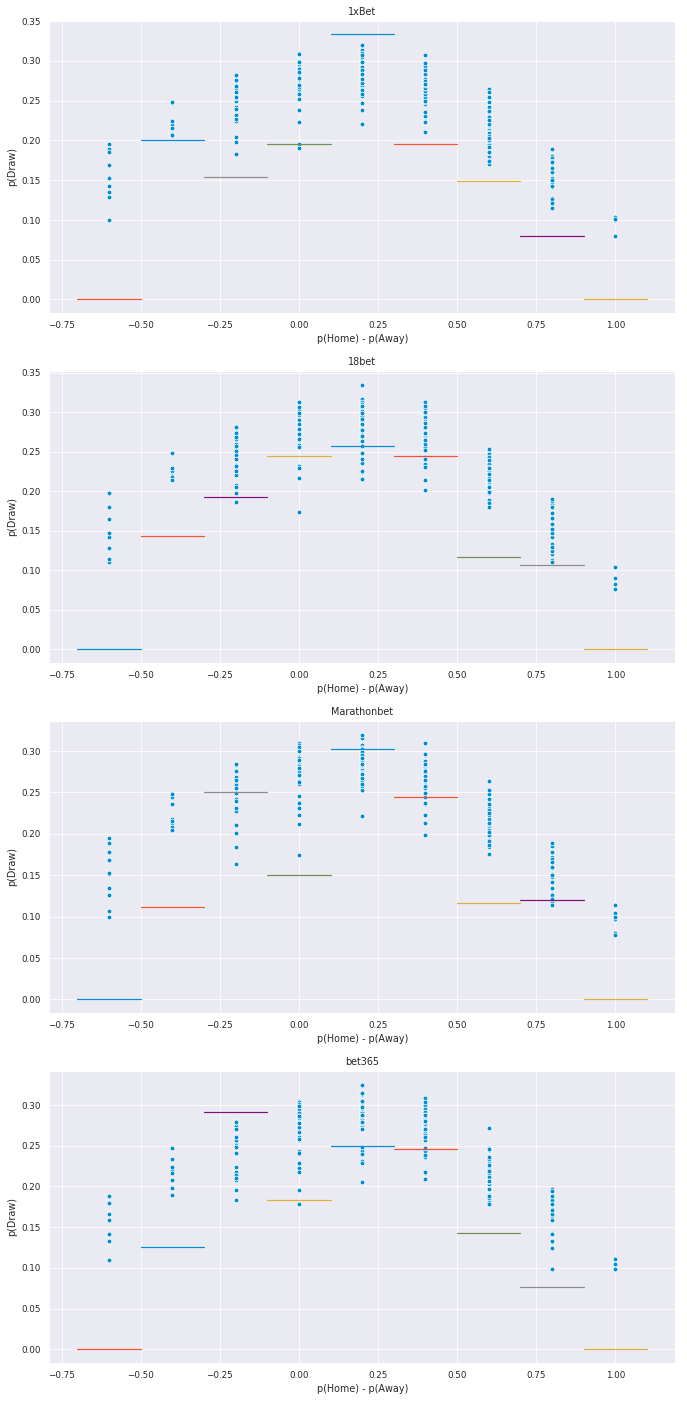

In [59]:
bets_pivoted["home_minus_away_disc"]=bets_pivoted["home_minus_away"].apply(lambda x:-0.8 if -1<x<=-0.8 
                                            else -0.6 if -0.8<x<=-0.6
                                            else -0.4 if -0.6<x<=-0.4
                                            else -0.2 if -0.4<x<=-0.2
                                            else 0 if -0.2<x<=0
                                            else 0.2 if 0<x<=0.2
                                            else 0.4 if 0.2<x<=0.4
                                            else 0.6 if 0.4<x<=0.6
                                            else 0.8 if 0.6<x<=0.8
                                            else 1)
_,axx=plt.subplots(4,figsize=(10,23))
for i,bm in enumerate(bookmakers):
    bm_bets=bets_pivoted.loc[bets_pivoted["odd_bookmakers"]==bm]
    sns.scatterplot(x=bm_bets["home_minus_away_disc"], y=bm_bets["probs_x"],ax=axx[i])
    for prob in bm_bets["home_minus_away_disc"].value_counts().index:
        draw_f=len(bm_bets.loc[(bm_bets["home_minus_away_disc"]==prob)&(bm_bets["match_id"].isin(matches_finished_draw))])
        all_f=len(bm_bets.loc[(bm_bets["home_minus_away_disc"]==prob)])
        sns.lineplot(x=[prob-0.1,prob+0.1],y=[draw_f/all_f,draw_f/all_f],ax=axx[i])
    axx[i].set_title(bm)
    axx[i].set_xlabel("p(Home) - p(Away)")
    axx[i].set_ylabel("p(Draw)")

## Task 3


In [60]:
outlier_goals=goals.loc[goals["time"].str.contains("90\+")].time.value_counts().index.tolist()
goals_mod=goals.loc[goals["time"].isin(outlier_goals)]
goals_mod["diff"]=goals_mod["score"].apply(lambda x: int(x.split(" - ")[1])-int(x.split(" - ")[0]))
goals_mod=goals_mod.loc[goals_mod["diff"].isin([-1,0,1])]
goals_mod.head()
# 283 mac var bu olayın oldugu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,match_id,time,home_scorer,score,away_scorer,diff
465,13296,90+2,Cleverley T.,2 - 1,NaN,-1
750,13278,90+7,Zaha W.,2 - 2,NaN,0
1265,63001,90+2,NaN,0 - 1,Sanchez A.,1
1340,63572,90+6,Sterling R.,2 - 1,NaN,-1
1502,66081,90+2,McArthur J.,2 - 1,NaN,-1


In [61]:
booking["whos_fault"]=np.where(booking["home_fault"].isna(),"away","home") # this wasnt necessary but i wanted to keep it anyway
booking_mod=booking.drop(booking.loc[booking["time"].str.contains("\+")].index)
booking_mod=booking_mod.loc[(booking_mod["time"].astype(int)<=20)&(booking_mod["card"]=="red card")]
booking_mod.head()
# 44 mac var bu olayın oldugu

,match_id,time,home_fault,card,away_fault,whos_fault
436,13422,15,NaN,red card,Coady C.,away
5681,83075,15,NaN,red card,Mavropanos K.,away
9299,167048,19,NaN,red card,Boly W.,away
11037,186626,4,NaN,red card,Maguire H.,away
12094,200965,11,Deeney T.,red card,NaN,home


In [62]:
len(booking_mod)

5

In [63]:
# matches concated
unq_match_outlier=booking_mod["match_id"].values.astype(int).tolist()
for i in goals_mod["match_id"].values:
    unq_match_outlier.append(i)
unq_match_outlier=np.unique(unq_match_outlier)
unq_match_outlier

array([ 13278,  13296,  13422,  63001,  63572,  66081,  67049,  67259,
        67896,  68013,  69167,  83075,  94272,  98608,  98614, 124185,
       127460, 167048, 171046, 182205, 184816, 184817, 186624, 186626,
       187083, 200965, 202231, 208233, 224448, 224453, 224466, 224477,
       224497])

In [64]:
len(unq_match_outlier)
# sadece 311 mac var

33

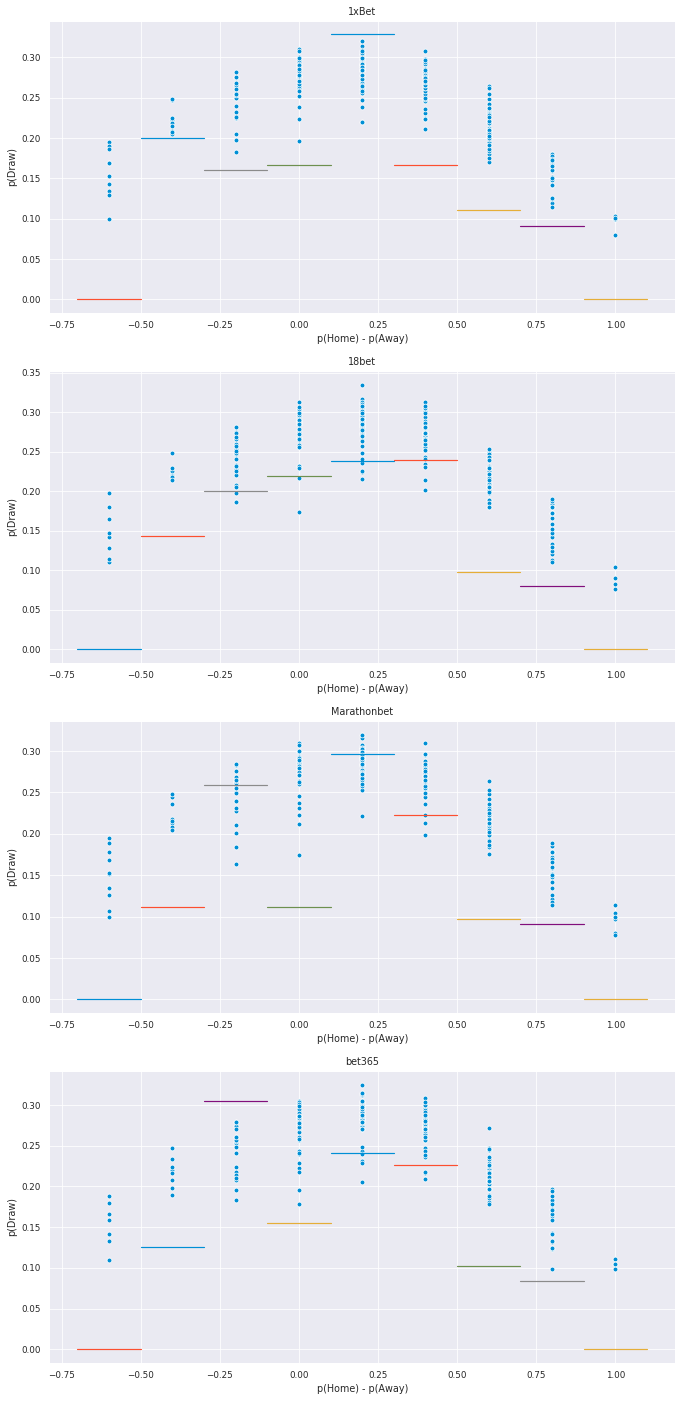

In [67]:
_,axx=plt.subplots(4,figsize=(10,23))
bets_pivoted_n=bets_pivoted.loc[~bets_pivoted["match_id"].isin(unq_match_outlier)]
for i,bm in enumerate(bookmakers):
    bm_bets=bets_pivoted_n.loc[bets_pivoted_n["odd_bookmakers"]==bm]
    sns.scatterplot(x=bm_bets["home_minus_away_disc"], y=bm_bets["probs_x"],ax=axx[i])
    for prob in bm_bets["home_minus_away_disc"].value_counts().index:
        draw_f=len(bm_bets.loc[(bm_bets["home_minus_away_disc"]==prob)&(bm_bets["match_id"].isin(matches_finished_draw))])
        all_f=len(bm_bets.loc[(bm_bets["home_minus_away_disc"]==prob)])
        sns.lineplot(x=[prob-0.1,prob+0.1],y=[draw_f/all_f,draw_f/all_f],ax=axx[i])
    axx[i].set_title(bm)
    axx[i].set_xlabel("p(Home) - p(Away)")
    axx[i].set_ylabel("p(Draw)")

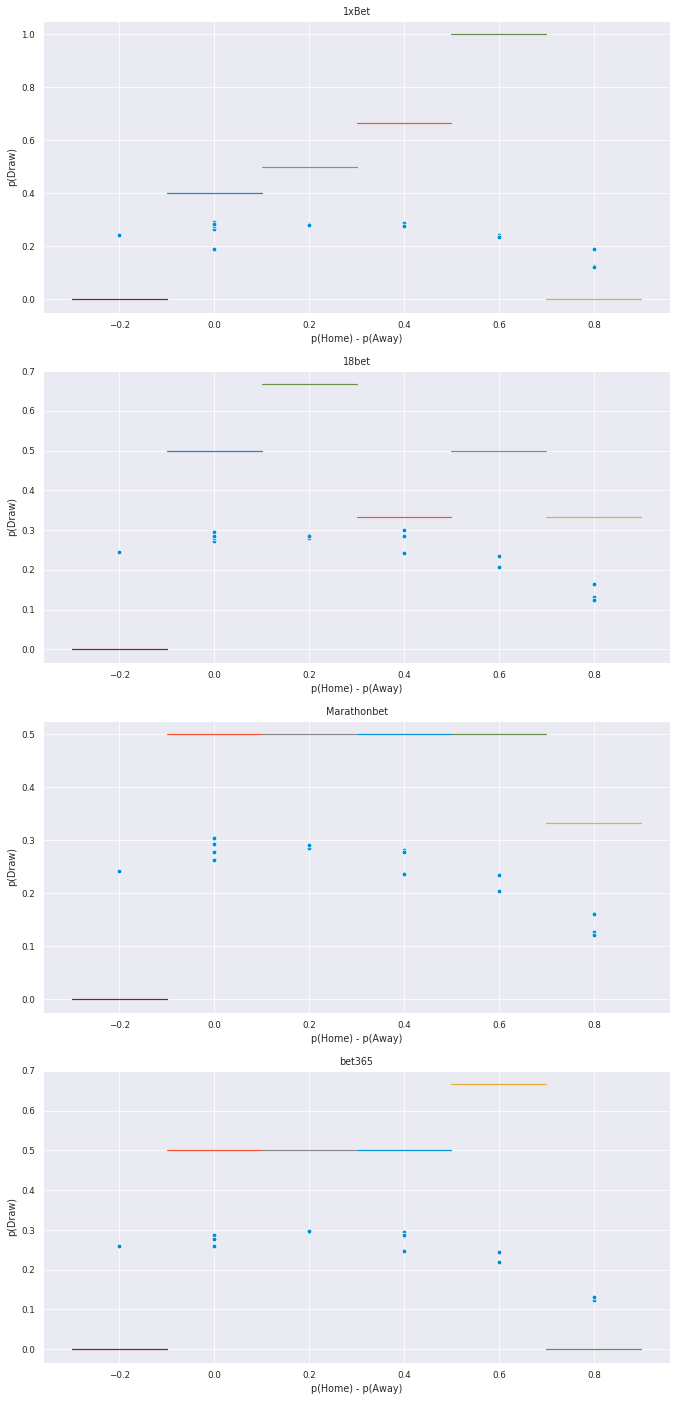

In [68]:
_,axx=plt.subplots(4,figsize=(10,23))
bets_pivoted_n=bets_pivoted.loc[bets_pivoted["match_id"].isin(unq_match_outlier)]
for i,bm in enumerate(bookmakers):
    bm_bets=bets_pivoted_n.loc[bets_pivoted_n["odd_bookmakers"]==bm]
    sns.scatterplot(x=bm_bets["home_minus_away_disc"], y=bm_bets["probs_x"],ax=axx[i])
    for prob in bm_bets["home_minus_away_disc"].value_counts().index:
        draw_f=len(bm_bets.loc[(bm_bets["home_minus_away_disc"]==prob)&(bm_bets["match_id"].isin(matches_finished_draw))])
        all_f=len(bm_bets.loc[(bm_bets["home_minus_away_disc"]==prob)])
        sns.lineplot(x=[prob-0.1,prob+0.1],y=[draw_f/all_f,draw_f/all_f],ax=axx[i])
    axx[i].set_title(bm)
    axx[i].set_xlabel("p(Home) - p(Away)")
    axx[i].set_ylabel("p(Draw)")